# Task
Build, train, and evaluate a Convolutional Neural Network (CNN) image classifier using an image dataset, and then summarize its performance, discuss potential improvements, and provide visualizations.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully.")

Libraries imported successfully.


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


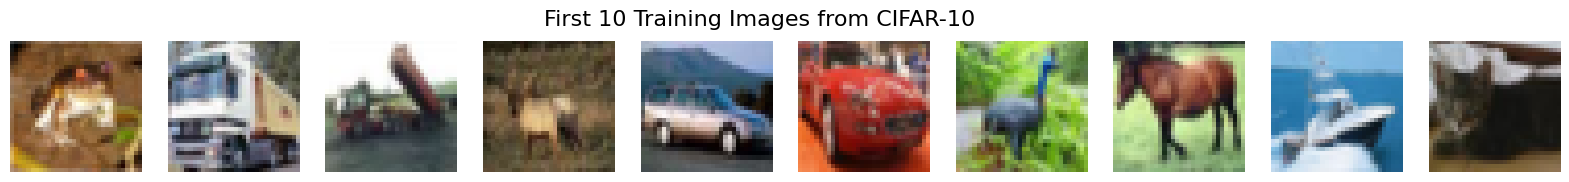

images displayed successfully.


In [ ]:
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shapes of the datasets
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Display the first few images from the training set
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.suptitle('First 10 Training Images from CIFAR-10', fontsize=16)
plt.show()

print("images displayed successfully.")

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"Shape of x_train after normalization: {x_train.shape}")
print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of x_test after normalization: {x_test.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")
print("Image data normalized and labels one-hot encoded successfully.")

Shape of x_train after normalization: (50000, 32, 32, 3)
Shape of y_train after one-hot encoding: (50000, 10)
Shape of x_test after normalization: (10000, 32, 32, 3)
Shape of y_test after one-hot encoding: (10000, 10)
Image data normalized and labels one-hot encoded successfully.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 2. Initialize a Sequential model.
model = Sequential([
    # 3. Add a Conv2D layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # 4. Add a MaxPooling2D layer
    MaxPooling2D((2, 2)),
    # 5. Add another Conv2D layer
    Conv2D(64, (3, 3), activation='relu'),
    # 6. Add another MaxPooling2D layer
    MaxPooling2D((2, 2)),
    # 7. Flatten the output
    Flatten(),
    # 8. Add a Dense layer
    Dense(128, activation='relu'),
    # 9. Add a final Dense layer for output
    Dense(num_classes, activation='softmax')
])

# 10. Print a summary of the model's architecture
model.summary()
print("CNN model built successfully.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

CNN model built successfully.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("CNN model compiled successfully.")

CNN model compiled successfully.


In [10]:
num_classes = 10
if y_train.shape[-1] != num_classes:
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
if y_test.shape[-1] != num_classes:
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Re-compile the model to reset its state before retraining
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

print("CNN model trained successfully.")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.6978 - loss: 0.8769 - val_accuracy: 0.6396 - val_loss: 1.0908
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7266 - loss: 0.7902 - val_accuracy: 0.6366 - val_loss: 1.1184
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.7445 - loss: 0.7301 - val_accuracy: 0.6533 - val_loss: 1.0868
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7727 - loss: 0.6549 - val_accuracy: 0.6579 - val_loss: 1.1222
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7866 - loss: 0.6051 - val_accuracy: 0.6402 - val_loss: 1.2137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8068 - loss: 0.5654 - val_accuracy: 0.6616 - val_loss: 1.2197
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8188 - loss: 0.5176 - val_accuracy: 0.6455 - val_loss: 1.2991
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8307 -

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities for the test set
y_pred_probabilities = model.predict(x_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Test Loss: 1.4979
Test Accuracy: 0.6390
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1000
           1       0.74      0.79      0.76      1000
           2       0.53      0.56      0.55      1000
           3       0.44      0.43      0.43      1000
           4       0.58      0.50      0.54      1000
           5       0.55      0.58      0.57      1000
           6       0.65      0.78      0.71      1000
           7       0.73      0.61      0.67      1000
           8       0.77      0.76      0.76      1000
           9       0.73      0.71      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000


Confusion Matrix:
[[664  32  62  29  33   9  11  16  96  48]
 [ 19 788  12  20   4  10  15   7  18 107]
 [ 78   9 565  77  60  84  75 